In [28]:
# install packages
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [8]:

# MNB-TF-IDF model
 
df_cleaned = pd.read_csv('labelled_20-500.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['speech'], df_cleaned['renamed_party'], test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(max_features=100000), MultinomialNB(alpha=0.05))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.6061
F1 Score: 0.5946
Precision: 0.6203
Recall: 0.6061

Confusion Matrix:
[[ 1640   738  1491   218]
 [   69 15274  7026   650]
 [   72  6185 16631   609]
 [  142  2944  3404  2688]]

Classification Report:
                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.85      0.40      0.55      4087
                               νεα δημοκρατια       0.61      0.66      0.63     23019
                               πασοκ συνολικο       0.58      0.71      0.64     23497
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.65      0.29      0.40      9178

                                     accuracy                           0.61     59781
                                    macro avg       0.67      0.52      0.56     59781
                                 weighted avg       0.62      0.61      0.59     59781



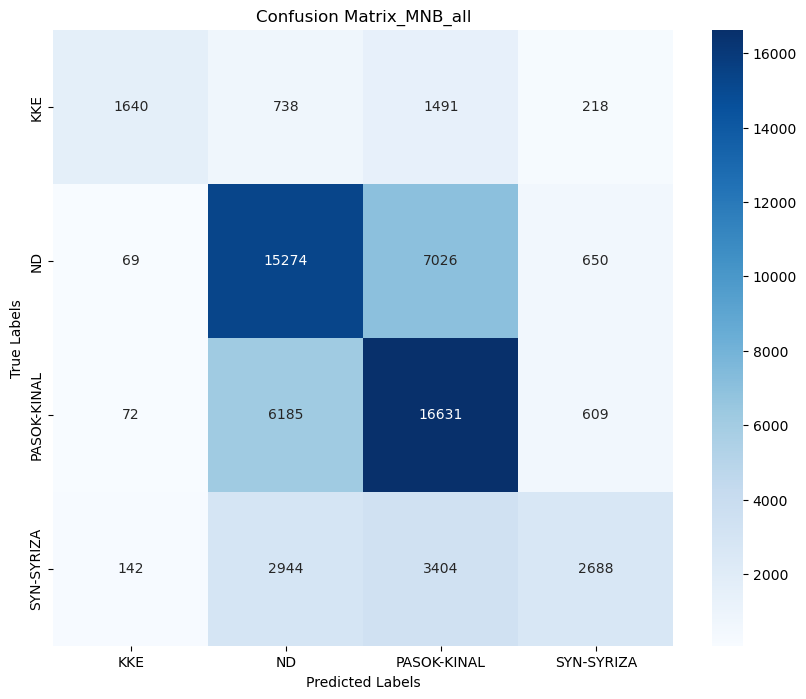

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the confusion matrix
confusion_matrix_data = np.array([
    [1640, 738, 1491, 218],
    [69, 15274, 7026, 650],
    [72, 6185, 16631, 609],
    [142, 2944, 3404, 2688]
])

# Class names translated in the specified order
class_names = ["KKE", "ND", "PASOK-KINAL", "SYN-SYRIZA"]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix_MNB_all')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [9]:
#Accuracy per lenght category

# Load and prepare the dataset
df_cleaned = pd.read_csv('labelled_20-500.csv')
df_cleaned['speech_length'] = df_cleaned['speech'].apply(lambda x: len(x.split()))
bins = [0, 50, 150, 250, 350, 450, float('inf')]
labels = ['0-50', '50-150', '150-250', '250-350', '350-450', '450+']
df_cleaned['length_category'] = pd.cut(df_cleaned['speech_length'], bins=bins, labels=labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['speech'], df_cleaned['renamed_party'], test_size=0.2, random_state=42)

# Predict with the trained model
y_pred = model.predict(X_test)

# Merge predictions into test DataFrame for analysis
test_df = X_test.to_frame(name='speech').reset_index(drop=True)
test_df['predicted_party'] = y_pred
test_df['true_party'] = y_test.reset_index(drop=True)
test_df['length_category'] = df_cleaned.loc[X_test.index, 'length_category'].values

# Calculate and print accuracy for each speech length category
accuracy_by_length = test_df.groupby('length_category').apply(
    lambda x: accuracy_score(x['true_party'], x['predicted_party'])
)

print("\nAccuracy per Speech Length Category:")
print(accuracy_by_length)



Accuracy per Speech Length Category:
length_category
0-50       0.558757
50-150     0.608819
150-250    0.626729
250-350    0.663877
350-450    0.675281
450+       0.675830
dtype: float64


In [34]:
#model with hyperparameter grid

df_cleaned = pd.read_csv('cleaned_labelled_2.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['speech'], df_cleaned['ideology_2'], test_size=0.2, random_state=42)

# Define the pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Define the hyperparameter grid
param_grid = {  
    'tfidfvectorizer__max_features': [200000, 230000, 250000, 270000, 300000],
    'multinomialnb__alpha': [0.04, 0.05, 0.06] 
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='F1')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Best Parameters: {'multinomialnb__alpha': 0.05, 'tfidfvectorizer__max_features': 270000}
Accuracy: 0.5114
F1 Score: 0.4980
Precision: 0.5206
Recall: 0.5114


Accuracy: 0.5114
F1 Score: 0.4980
Precision: 0.5203
Recall: 0.5114

Confusion Matrix:
[[51107 28100  5450   341]
 [28660 48025  5017   512]
 [15933 16623 18496   324]
 [ 3918  5674  3267  1483]]

Classification Report:
              precision    recall  f1-score   support

 centre-left       0.51      0.60      0.55     84998
centre-right       0.49      0.58      0.53     82214
        left       0.57      0.36      0.44     51376
       right       0.56      0.10      0.17     14342

    accuracy                           0.51    232930
   macro avg       0.53      0.41      0.43    232930
weighted avg       0.52      0.51      0.50    232930

In [25]:
df_new = pd.read_csv('part3_val.csv')

#'Speech' is the feature and 'renamed_party' is the label
X_new = df_new['speech']
y_new = df_new['renamed_party']

# Make predictions on the new dataset
y_new_pred = model.predict(X_new)

# Evaluate the model
new_accuracy = accuracy_score(y_new, y_new_pred)
new_f1 = f1_score(y_new, y_new_pred, average='weighted')
new_precision = precision_score(y_new, y_new_pred, average='weighted')
new_recall = recall_score(y_new, y_new_pred, average='weighted')

print(f'New Dataset Accuracy: {new_accuracy:.4f}')
print(f'New Dataset F1 Score: {new_f1:.4f}')
print(f'New Dataset Precision: {new_precision:.4f}')
print(f'New Dataset Recall: {new_recall:.4f}')

# Print new confusion matrix
new_conf_matrix = confusion_matrix(y_new, y_new_pred)
print("\nNew Dataset Confusion Matrix:")
print(new_conf_matrix)

# Print new classification report
new_class_report = classification_report(y_new, y_new_pred)
print("\nNew Dataset Classification Report:")
print(new_class_report)

New Dataset Accuracy: 0.5392
New Dataset F1 Score: 0.5369
New Dataset Precision: 0.5735
New Dataset Recall: 0.5392

New Dataset Confusion Matrix:
[[ 889  287  351  190]
 [  12 4445 1573  627]
 [  17 1973 3285  544]
 [  74 2182 1710 2544]]

New Dataset Classification Report:
                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.90      0.52      0.66      1717
                               νεα δημοκρατια       0.50      0.67      0.57      6657
                               πασοκ συνολικο       0.47      0.56      0.52      5819
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.65      0.39      0.49      6510

                                     accuracy                           0.54     20703
                                    macro avg       0.63      0.54      0.56     20703
                                 weighted avg       0.57      0.54      0.54     20703



In [18]:
df_new = pd.read_csv('part2_val.csv')

#'speech' is the feature and 'renamed_party' is the label
X_new = df_new['speech']
y_new = df_new['renamed_party']

# Make predictions on the new dataset
y_new_pred = model.predict(X_new)

# Evaluate the model
new_accuracy = accuracy_score(y_new, y_new_pred)
new_f1 = f1_score(y_new, y_new_pred, average='weighted')
new_precision = precision_score(y_new, y_new_pred, average='weighted')
new_recall = recall_score(y_new, y_new_pred, average='weighted')

print(f'New Dataset Accuracy: {new_accuracy:.4f}')
print(f'New Dataset F1 Score: {new_f1:.4f}')
print(f'New Dataset Precision: {new_precision:.4f}')
print(f'New Dataset Recall: {new_recall:.4f}')

# Print new confusion matrix
new_conf_matrix = confusion_matrix(y_new, y_new_pred)
print("\nNew Dataset Confusion Matrix:")
print(new_conf_matrix)

# Print new classification report
new_class_report = classification_report(y_new, y_new_pred)
print("\nNew Dataset Classification Report:")
print(new_class_report)

New Dataset Accuracy: 0.6540
New Dataset F1 Score: 0.6416
New Dataset Precision: 0.6638
New Dataset Recall: 0.6540

New Dataset Confusion Matrix:
[[ 504  258  503   15]
 [  51 6019 3021   21]
 [  28 1880 6174   55]
 [  50  253  646  122]]

New Dataset Classification Report:
                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.80      0.39      0.53      1280
                               νεα δημοκρατια       0.72      0.66      0.69      9112
                               πασοκ συνολικο       0.60      0.76      0.67      8137
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.57      0.11      0.19      1071

                                     accuracy                           0.65     19600
                                    macro avg       0.67      0.48      0.52     19600
                                 weighted avg       0.66      0.65      0.64     19600



In [19]:
df_new = pd.read_csv('part1_val.csv')

#'speech' is the feature and 'renamed_party' is the label
X_new = df_new['speech']
y_new = df_new['renamed_party']

# Make predictions on the new dataset
y_new_pred = model.predict(X_new)

# Evaluate the model
new_accuracy = accuracy_score(y_new, y_new_pred)
new_f1 = f1_score(y_new, y_new_pred, average='weighted')
new_precision = precision_score(y_new, y_new_pred, average='weighted')
new_recall = recall_score(y_new, y_new_pred, average='weighted')

print(f'New Dataset Accuracy: {new_accuracy:.4f}')
print(f'New Dataset F1 Score: {new_f1:.4f}')
print(f'New Dataset Precision: {new_precision:.4f}')
print(f'New Dataset Recall: {new_recall:.4f}')

# Print new confusion matrix
new_conf_matrix = confusion_matrix(y_new, y_new_pred)
print("\nNew Dataset Confusion Matrix:")
print(new_conf_matrix)

# Print new classification report
new_class_report = classification_report(y_new, y_new_pred)
print("\nNew Dataset Classification Report:")
print(new_class_report)

New Dataset Accuracy: 0.6287
New Dataset F1 Score: 0.5963
New Dataset Precision: 0.6240
New Dataset Recall: 0.6287

New Dataset Confusion Matrix:
[[ 247  193  637   13]
 [   6 4736 2417    2]
 [  27 2307 7143   10]
 [  18  503 1042   22]]

New Dataset Classification Report:
                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.83      0.23      0.36      1090
                               νεα δημοκρατια       0.61      0.66      0.64      7161
                               πασοκ συνολικο       0.64      0.75      0.69      9487
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.47      0.01      0.03      1585

                                     accuracy                           0.63     19323
                                    macro avg       0.64      0.41      0.43     19323
                                 weighted avg       0.62      0.63      0.60     19323



In [29]:
!pip freeze > requirements.txt